# Artificial Neural Networks

In [1]:
%pylab inline
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


## What is Backprop?

* We have to optimize $\boldsymbol{w}$ such that $E$ is at a **minimum**.


* Backprop is a procedure to compute the **gradient of the error function with respect to the weights** of a neural network.


* We can use the gradient from backprop to apply **gradient descent**.


![Learning ANNs](files/03_ann/ann-learning.svg)

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("MkLJ-9MubKQ")

In [3]:
print YouTubeVideo("MkLJ-9MubKQ").src

http://www.youtube.com/embed/MkLJ-9MubKQ


## Difficulties

* There are many **local minima**.
* The optimization problem is **ill-conditioned**.
* There are many **flat regions** (saddle points).
* There is **no guarantee** to reach the global minimum.
* Deep architectures suffer from the **vanishing gradient** problem.
* Neural networks are *usually* considered to be the **blackest box** of all learning algorithms.
* There are sooo many **hyperparameters** (number of layers/nodes, activation function, connectivity, weight initialization, loss function, regularization, ...).
* Training neural networks has been regarded as **black magic** by many researchers.
* And here is the grimoire: [Neural Networks: Tricks of the Trade](http://link.springer.com/book/10.1007%2F978-3-642-35289-8) (1st edition: 1998; 2nd edition: 2012).


However, there have been three hypes around ANNs:

* Perceptron (50s-XOR problem)
* Backpropagation (80s-SVM)
* Deep Learning (2006-now)

And they work incredibly well in practice.

## XOR Problem

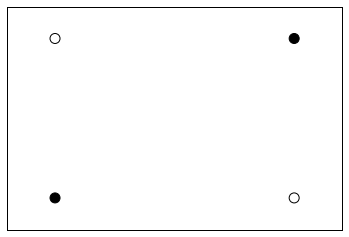

In [2]:
# Dataset
X = array([[0, 1], [1, 0], [0, 0], [1, 1]])
Y = array([1, 1, 0, 0])
N = Y.shape[0]

scatter(X[:, 0], X[:, 1], c=Y, cmap=cm.gray, s=100)
r = setp(gca(), xticks=(), yticks=())

## Error Surface of the XOR Problem

Activation function

In [3]:
def logit(a): return 1.0/(1+exp(-a))

Forward propagation for 2 inputs (x1, x2), 2 hidden nodes, 1 output

In [4]:
def fprop(x1,x2,w1=0.1,w2=0.2,b1=0.1,w3=-0.2,w4=0.2,b2=-0.1,w5=-0.3,w6=-0.25,b3=0.2):
    return logit(b1+w1*logit(b2+w3*x1+w4*x2)+w2*logit(b3+w5*x1+w6*x2))

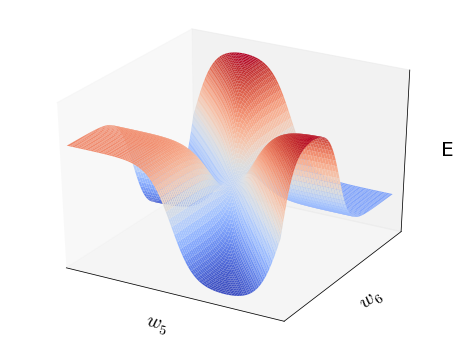

In [5]:
i, j = 4, 5 # Weight indices
fig = figure(figsize=(8, 6))
W1, W2 = meshgrid(arange(-10, 10, 0.25), arange(-10, 10, 0.25))
E = numpy.sum([(fprop(X[n, 0], X[n, 1], **{"w%d"%(i+1) : W1, "w%d"%(j+1) : W2})-Y[n])**2
               for n in range(N)], axis=0)
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(W1, W2, E, rstride=1, cstride=1,
                       cmap=cm.coolwarm, lw=0)
setp(ax, xticks=(), yticks=(), zticks=(),
     xlabel="$w_%d$" % (i+1), ylabel="$w_%d$" % (j+1), zlabel="E")
matplotlib.rcParams.update({"font.size": 20})

# Application of the Week: Handwritten Digit Recognition

* [THE MNIST DATABASE of handwritten digits](http://yann.lecun.com/exdb/mnist/)
* 28x28 = 784 pixels
* 60,000 examples for training
* 10,000 examples for testing
* (MNIST can be considered as "solved" and is now a standard benchmark.)

In [10]:
import sys
sys.path.append("03_ann")
from mnist import read
images, labels = read(range(10), 'testing', path="03_ann")

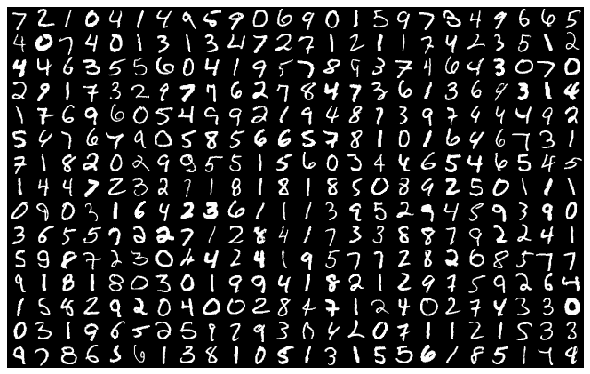

In [9]:
nrows, ncols = (15, 24)
figure(figsize=(ncols/3, nrows/3))
subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.0, hspace=0.0)
for i in range(nrows*ncols):
    setp(subplot(nrows, ncols, i+1), xticks=[], yticks=[])
    imshow(images[i], cmap=cm.gray, interpolation="nearest")

## Convolutional Neural Network (CNN)

![Convolution](files/03_ann/convolution.svg)

In [11]:
import pickle
from tools import scale, model_accuracy

X_mnist = scale(images)[:, newaxis, :, :]
net = pickle.load(open("03_ann/cnn.pickle", "rb"))
print "Accuracy on MNIST test set: %.2f %%" % (100*model_accuracy(net, X_mnist, labels))

Accuracy on MNIST test set: 98.70 %


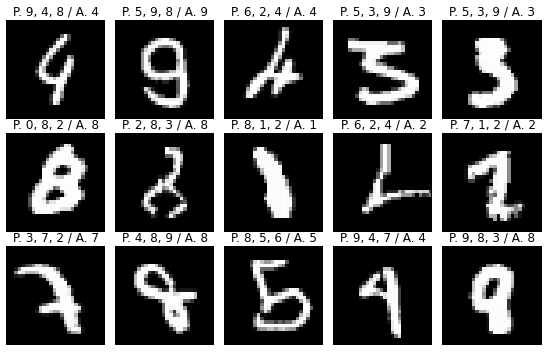

In [11]:
nrows, ncols = 3, 5
matplotlib.rcParams.update({"font.size": 10})
figure(figsize=(1.5*ncols, 1.5*nrows))
subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.05, hspace=0.15)
i = j = 0
while j < ncols*nrows:
    p, a = net.predict([X_mnist[i]]).ravel().argsort()[::-1], labels[i]
    if p[0] != a:
        setp(subplot(nrows, ncols, j+1), xticks=[], yticks=[])
        title("P. %d, %d, %d / A. %d" % (p[0], p[1], p[2], a))
        imshow(images[i], cmap=cm.gray, interpolation="nearest")
        j += 1
    i += 1

# Artificial Neuron

![Neuron](files/03_ann/neuron.svg)

# Multilayer Neural Network

![Layers](files/03_ann/net.png)

# The Original Fprop/Backprop Formulas

## Fprop

In each layer

$$a_j = \sum_i w_{ji} x_i$$
$$y_j = g(a_j)$$

where

* $y_j$ is the $j$th output
* $x_i$ is the $i$th input
* $w_{ji}$ is the weight
* $a_{j}$ is called activation
* $g$ is the activation function, e.g. $\tanh$ in the hidden layers and the identity in the last layer (for regression)

Error function (SSE)

$$E = \frac{1}{2} \sum_n \sum_j \left( y_j^{(n)} - t_j^{(n)} \right)^2$$

## Backprop

In each layer (we will omit the sample index $n$)

$$\delta_j = \begin{cases}y_j - t_j & \text{in the output layer}\\\\ g'(a_j) \sum_k \frac{\partial E}{\partial y_k} & \text{otherwise}\end{cases},$$

$$\frac{\partial E}{\partial w_{ji}} = \delta_j x_i$$

$$\frac{\partial E}{\partial x_i} = \delta_j w_{ji}$$

where

* all nodes $k$ are in the layer after $j$
* $a_j$ is known from fprop: $\sum_i w_{ji} x_i$
* actually you do not have to save $a_j$ because $g'(a_j)$ usually can be computed from $y_j$, e.g.
    * identity function: $g'(a_j) = 1$
    * $\tanh$: $g'(a_j) = 1 - y_j^2$
* $\frac{\partial E^{(n)}}{\partial w_{ji}}$ will be used to update the weight $w_{ji}$ in gradient descent
* $\frac{\partial E^{(n)}}{\partial x_i}$ will be passed to the previous layer to compute the deltas

**Do not forget to sum up the gradient with respect to the weights for each training example!**

# Efficient Fprop/Backprop Implementation for Fully Connected Layers

* Make sure that you have an efficient **linear algebra library**.
* Organize your data in matrices, i.e.
    * The matrix $\boldsymbol{X}$ contains an input vector in each row. Note that you must expand each row by the bias 1.
    * The matrix $\boldsymbol{T}$ contains an output (of the network) in each row.
* Each layer should have the functions
    * `fprop(W, X, g) -> Y`
    * `backprop(W, X, g_derivative, Y, dE/dY) -> dE/dX, dEdW`

![Backprop](files/03_ann/backprop.svg)

## Efficient Fprop

In each layer

$$\boldsymbol{A} = \boldsymbol{X} \boldsymbol{W}^T$$
$$\boldsymbol{Y} = g(\boldsymbol{A})$$

where

* $\boldsymbol{Y} \in \mathbb{R}^{N \times J}$ contains an output vector in each row, i.e. $\boldsymbol{Y}_{nj} = y^{(n)}_j$
* $\boldsymbol{X} \in \mathbb{R}^{N \times I}$ contains an input vector (the output of the previous layer) in each row, i.e. $\boldsymbol{X}_{ni} = x^{(n)}_i$
* $\boldsymbol{W} \in \mathbb{R}^{J \times I}$ is the weight matrix of the layer, i.e. $\boldsymbol{W}_{ji}$ is the weight between input $i$ and output $j$.
* $g$ is the activation function (implemented to work with matrices)
* $I$ is the number of inputs, i.e. the number of outputs of the previous layer plus 1 (for the bias)
* $J$ is the number of outputs

**Make sure that you add the bias entry in each row before you pass $Y$ as input to the next layer!**

Error function (SSE)

$$E = \frac{1}{2} ||\boldsymbol{Y} - \boldsymbol{T}||_2^2$$

where

* $||.||_2$ is the [Frobenius norm](http://en.wikipedia.org/wiki/Matrix_norm#Frobenius_norm).

## Efficient Backprop

In each layer

$$\Delta = g'(\boldsymbol{A}) * \frac{\partial E}{\partial \boldsymbol{Y}}$$
$$\frac{\partial E}{\partial \boldsymbol{W}} = \Delta^T \cdot \boldsymbol{X}$$
$$\frac{\partial E}{\partial \boldsymbol{X}} = \Delta \cdot \boldsymbol{W}$$

where

* $*$ is the [Hadamard product](http://en.wikipedia.org/wiki/Hadamard_product_%28matrices%29) or Schur product or entrywise product
* $\frac{\partial E}{\partial \boldsymbol{Y}}$ contains derivatives of the error function with respect to the outputs ($\boldsymbol{Y} - \boldsymbol{T} = \frac{\partial E}{\partial \boldsymbol{Y}}$ in the last layer)
* $\frac{\partial E}{\partial \boldsymbol{X}} \in \mathbb{R}^{N \times I}$ contains derivatives of the error function with respect to the inputs and will be passed to the previous layer
* $\Delta \in \mathbb{R}^{N \times J}$ contains deltas: $\delta_j^{(n)} = \Delta_{jn}$
* $g'$ is the derivative of $g$ and can be computed based only on $\boldsymbol{Y}$
* $\frac{\partial E}{\partial \boldsymbol{W}} \in \mathbb{R}^{J \times I}$ contains the derivatives of the error function with respect to $\boldsymbol{W}$ and will be used to optimize the weights of the ANN

**Make sure that you remove the bias entry in each row before you pass $\frac{\partial E}{\partial \boldsymbol{X}}$ to the previous layer!**

## Tips for Your Implementations

* Check your gradients.
* Check your gradients.
* Check your gradients.
* With finite differences:
$$\frac{\partial E^{(n)}}{\partial w_{ji}} = \frac{E^{(n)}(w_{ji} + \epsilon) - E^{(n)}(w_{ji} - \epsilon)}{2 \epsilon} + \mathcal{O}(\epsilon^2)$$

## Question 1

* How should we initialize the weights $\boldsymbol{w}$?

## Answer 1

* Draw components of $\boldsymbol{w}$ iid (independend and identically distributed) from a Gaussian distrubition with **small** standard deviation, e.g. 0.05.
* Initialization with 0 will prevent the gradient from flowing back to the lower layers:
$$\frac{\partial E}{\partial x_i} = \delta_j w_{ji}$$

In [12]:
random.randn(10) * 0.05

array([-0.0083099 , -0.0595141 , -0.0077825 ,  0.02849865,  0.03862896,
        0.01154955, -0.02967691,  0.04293337,  0.00372174,  0.013474  ])

## Derivatives of Activation Functions

* Identity

$$y = g(a) = a$$
$$g'(a) = 1$$


* Hyperbolic tangent

$$y = g(a) = \tanh(a)$$
$$g'(a) = 1 - \tanh^2(a) = 1-y^2$$


* Logistic function

$$y = g(a) = \frac{1}{1+\exp{-a}}$$
$$g'(a) = g(a) (1 - g(a)) = y (1-y)$$

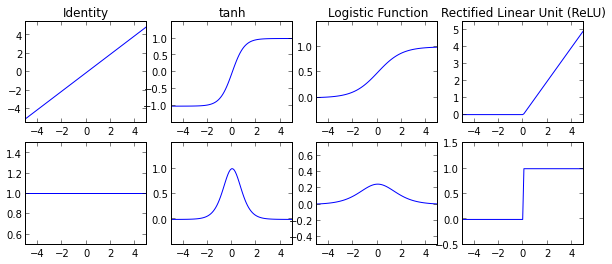

In [13]:
def plot_afun(x, y, sp_idx, label=None):
    """Plot activation function."""
    ax = subplot(2, 4, sp_idx)
    if label is not None: title(label)
    setp(ax, xlim=(min(x), max(x)), ylim=(min(y)-0.5, max(y)+0.5))
    plot(x, y)

figure(figsize=(10, 4))
x = linspace(-5, 5, 100)
plot_afun(x, x, 1, label="Identity")
plot_afun(x, tanh(x), 2, label="tanh")
plot_afun(x, logit(x), 3, label="Logistic Function")
plot_afun(x, numpy.max((x, zeros_like(x)), axis=0), 4, label="Rectified Linear Unit (ReLU)")
plot_afun(x, ones_like(x), 5)
plot_afun(x, 1-tanh(x)**2, 6)
plot_afun(x, logit(x)*(1-logit(x)), 7)
plot_afun(x, numpy.max((sign(x), zeros_like(x)), axis=0), 8)

# Why do neural nets work so well in practice?

* We don't want to find the global minimum. **Overfitting!**


* SGD finds **sufficiently good** local minima.

* Neural nets learn **feature hierarchies** to represent functions *efficiently*.


## Escaping Local Minima with SGD

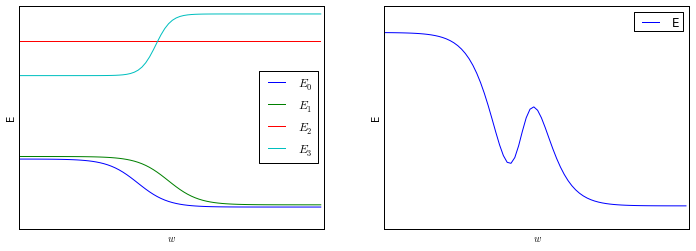

In [14]:
i, j = 4, 5

figure(figsize=(12, 4))
W = arange(-10, 10, 0.25)
errors = [(fprop(X[n, 0], X[n, 1], **{"w%d"%(i+1) : W, "w%d"%(j+1) : W+2})-Y[n])**2
          for n in range(N)]
subplot(1, 2, 1)
for n in range(N): plot(W, errors[n], label="$E_%d$" % n)
setp(gca(), xticks=(), yticks=(), xlabel="$w$", ylabel="E")
legend(loc="best")
subplot(1, 2, 2)
plot(W, numpy.sum(errors, axis=0), label="E")
setp(gca(), xticks=(), yticks=(), xlabel="$w$", ylabel="E")
legend(loc="best")

## Question 2

What are advantages and drawbacks in comparison to other regression and classification algorithms?

For example:

* linear regression, logistic regression
* SVR, SVM
* decision trees
* k-nearest neighbors

## Answer 2

Drawbacks
---------

* input has to be a **vector of real numbers**, e.g. text must be converted befor classification
* in general, the **optimization problem** is very difficult because it is **ill-conditioned** and **non-separable**
* objective function is **not convex**, there are many local minima and flat regions
* **black box**: in most cases it is very difficult to interpret the weights of a neural network although it is possible!
* **catastrophic forgetting**: learning one instance can change the whole network

Advantages
----------

* universal function approximator, **nonlinear** functions can be represented
* can learn **smooth** functions
* **features will be learned** automatically
* allows learning of **hierarchical features** which is much more efficient than just one layer of abstraction
* **multiclass classification** can be integrated with linear complexity (softmax activation function, cross-entropy error function)
* it is a **parametric** model, it does not store any training data directly